# Predicting potential churns
## Let's understand how to predict if a client is likely to leave a credit card service

### Importing libraries and files
We will begin by importing the necessary libraries and files to start the project.

In [91]:
import os, types
import pandas as pd
import numpy as np
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_f1e33a4bb9914ba7bde17a9ef2b01aa7 = 'https://s3-api.us-geo.objectstorage.softlayer.net'
else:
    endpoint_f1e33a4bb9914ba7bde17a9ef2b01aa7 = 'https://s3-api.us-geo.objectstorage.service.networklayer.com'

client_f1e33a4bb9914ba7bde17a9ef2b01aa7 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='4OPleZRsmhiW8AkSSIcvu7an84KmEDb3jkJaMBTBHqXP',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_f1e33a4bb9914ba7bde17a9ef2b01aa7)

body = client_f1e33a4bb9914ba7bde17a9ef2b01aa7.get_object(Bucket='portfolioproject1-donotdelete-pr-5vgfazhdyde5wn',Key='BankChurners.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)

### Next, let's check for information on the columns of the dataframe
We'll use functions like .describe() and .columns.

In [92]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [93]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

## Data Cleaning
This way we'll be able to check for any missing values and transform the data in order to make it more easy to understand.

In [94]:
# Removing unecessary columns (recommended by the dataset provider)

df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis = 1, inplace = True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis = 1, inplace = True)

### Let's check for any missing values
Missing values can heavily impact the outcomes of the codes in a project, so we'll be aiming to get rid of them.

In [95]:
# Using the .isnull() function to check for null values and the .sum() to see the amount of null values in the dataset

df.isnull().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

No missing values found! Great!

Moving on.

### Now, let's see if we can fix the names of the columns
We'll want to have all the column names in uppercase letters and get rid of unecessary terms in the column names.

In [96]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [97]:
# Replacing the names of the columns
old_columns = df.columns
new_columns = ['CLIENTNUM', 'ATTRITION', 'AGE', 'GENDER', 'DEPENDENT_COUNT', 'EDUCATION', 'MARITAL_STATUS', 'INCOME', 'CARD_CATEGORY', 'MONTHS_ON_BOOK', 
              'TOTAL_RELATIONSHIP_COUNT', 'MONTHS_INACTIVE', 'CONTACTS_COUNT', 'CREDIT_LIMIT', 'TOTAL_REVOLVING_BAL', 'AVG_OPEN_TO_BUY', 'TOTAL_AMT_CHNG_Q4_Q1',
              'TOTAL_TRANS_AMT', 'TOTAL_TRANS_CT', 'TOTAL_CT_CHNG_Q4_Q1', 'AVG_UTILIZATION_RATIO']

df.rename(columns=dict(zip(old_columns, new_columns)), inplace=True)
df.columns

Index(['CLIENTNUM', 'ATTRITION', 'AGE', 'GENDER', 'DEPENDENT_COUNT',
       'EDUCATION', 'MARITAL_STATUS', 'INCOME', 'CARD_CATEGORY',
       'MONTHS_ON_BOOK', 'TOTAL_RELATIONSHIP_COUNT', 'MONTHS_INACTIVE',
       'CONTACTS_COUNT', 'CREDIT_LIMIT', 'TOTAL_REVOLVING_BAL',
       'AVG_OPEN_TO_BUY', 'TOTAL_AMT_CHNG_Q4_Q1', 'TOTAL_TRANS_AMT',
       'TOTAL_TRANS_CT', 'TOTAL_CT_CHNG_Q4_Q1', 'AVG_UTILIZATION_RATIO'],
      dtype='object')

## Data Analysis
In this section, we will be analysing the data to check for correlations between features.

In [98]:
# Importing statistical analysis libraries

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from scipy import stats
import warnings

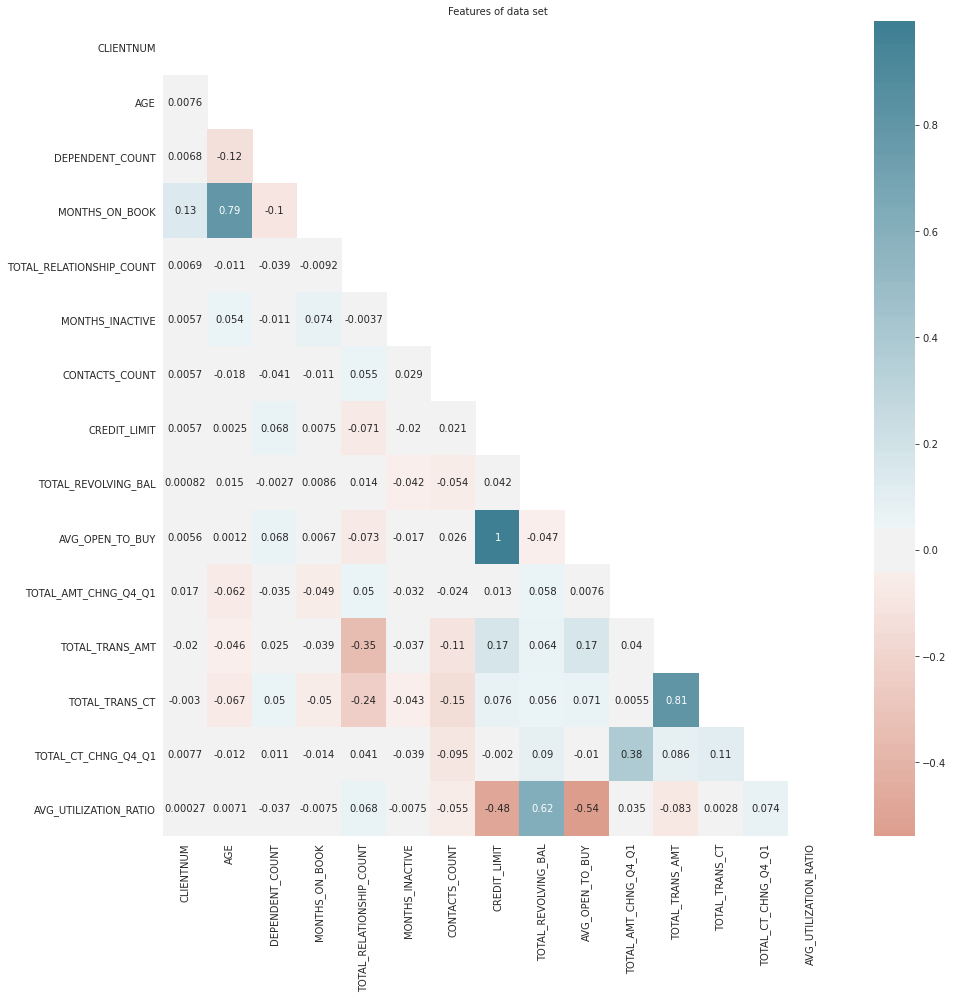

In [99]:
# Plotting a heatmap for correlation analysis

style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (15,15))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df.corr(), cmap=sns.diverging_palette(20, 220, n=200), annot=True, mask=mask, center = 0, );
plt.title("Features of data set", fontsize = 10);

### Is this analysis good enough? No!
By the results seen above, not only the features have little to no correlation between them, but the most important piece in this analysis is missing: Attrition, represented by the 'ATTRITION' column.

What exactly is the 'ATTRITION' column? It categorizes the customers which have an active account and those who no longer have an account (churns).

And why is this not being shown above? Well, the column 'ATTRITION' in the DataFrame is not numerical, but categorical. Also, it's not the only column missing in the Heatmap above.

Given this problem, what should we do? Simple. We'll transform the categorical columns which are not shown above in numerical columns. That way, we'll be able to see which features correlate better with the 'ATTRITION' column.


In [100]:
# Str Mapping the non-object columns

import copy
df_train=copy.deepcopy(df)

cols=np.array(df.columns[df.dtypes != object])
for i in df_train.columns:
    if i not in cols:
        df_train[i]=df_train[i].map(str)
df_train.drop(columns=cols,inplace=True)

In [101]:
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

# build dictionary function
cols=np.array(df.columns[df.dtypes != object])
d = defaultdict(LabelEncoder)

# only for categorical columns apply dictionary by calling fit_transform 
df_train = df_train.apply(lambda x: d[x.name].fit_transform(x))
df_train[cols] = df[cols]

In [102]:
df_train.head()

,ATTRITION,GENDER,EDUCATION,MARITAL_STATUS,INCOME,CARD_CATEGORY,CLIENTNUM,AGE,DEPENDENT_COUNT,MONTHS_ON_BOOK,...,MONTHS_INACTIVE,CONTACTS_COUNT,CREDIT_LIMIT,TOTAL_REVOLVING_BAL,AVG_OPEN_TO_BUY,TOTAL_AMT_CHNG_Q4_Q1,TOTAL_TRANS_AMT,TOTAL_TRANS_CT,TOTAL_CT_CHNG_Q4_Q1,AVG_UTILIZATION_RATIO
0,1,1,3,1,2,0,768805383,45,3,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,0,2,2,4,0,818770008,49,5,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,1,2,1,3,0,713982108,51,3,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,0,3,3,4,0,769911858,40,4,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,1,5,1,2,0,709106358,40,3,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [113]:
df_train.drop(['CLIENTNUM'], axis = 1, inplace = True)

df_train.columns


Index(['ATTRITION', 'GENDER', 'EDUCATION', 'MARITAL_STATUS', 'INCOME',
       'CARD_CATEGORY', 'AGE', 'DEPENDENT_COUNT', 'MONTHS_ON_BOOK',
       'TOTAL_RELATIONSHIP_COUNT', 'MONTHS_INACTIVE', 'CONTACTS_COUNT',
       'CREDIT_LIMIT', 'TOTAL_REVOLVING_BAL', 'AVG_OPEN_TO_BUY',
       'TOTAL_AMT_CHNG_Q4_Q1', 'TOTAL_TRANS_AMT', 'TOTAL_TRANS_CT',
       'TOTAL_CT_CHNG_Q4_Q1', 'AVG_UTILIZATION_RATIO'],
      dtype='object')

In [114]:
# Find most important features relative to target Price
print("Find most important features relative to Attrition-target")
corr = df_train.corr()
corr.sort_values(['ATTRITION'], ascending = False, inplace = True)
print(corr.ATTRITION)

Find most important features relative to Attrition-target
ATTRITION                   1.000000
TOTAL_TRANS_CT              0.371403
TOTAL_CT_CHNG_Q4_Q1         0.290054
TOTAL_REVOLVING_BAL         0.263053
AVG_UTILIZATION_RATIO       0.178410
TOTAL_TRANS_AMT             0.168598
TOTAL_RELATIONSHIP_COUNT    0.150005
TOTAL_AMT_CHNG_Q4_Q1        0.131063
GENDER                      0.037272
CREDIT_LIMIT                0.023873
CARD_CATEGORY               0.006038
AVG_OPEN_TO_BUY             0.000285
EDUCATION                  -0.005551
MONTHS_ON_BOOK             -0.013687
INCOME                     -0.017584
AGE                        -0.018203
MARITAL_STATUS             -0.018597
DEPENDENT_COUNT            -0.018991
MONTHS_INACTIVE            -0.152449
CONTACTS_COUNT             -0.204491
Name: ATTRITION, dtype: float64
